In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dataset = pd.read_csv('AirPassengers.csv')
dataset['Month']=pd.to_datetime(dataset['Month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

In [3]:
from datetime import datetime
indexedDataset.head(25)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


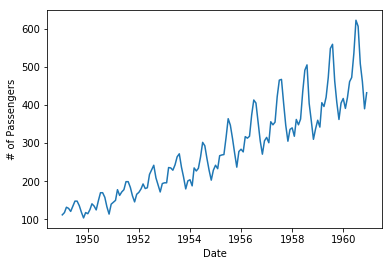

In [4]:
plt.xlabel('Date')
plt.ylabel('# of Passengers')
plt.plot(indexedDataset)

- A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past!

- We can check stationarity using the following:

- - Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. This is more of a visual technique.
- - Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TimeSeries is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [5]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    #Determing rolling statistics
    moving_average=timeseries.rolling(window=12).mean()
    standard_deviation=timeseries.rolling(window=12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries,color='blue',label="Original")
    plt.plot(moving_average,color='red',label='Mean')
    plt.plot(standard_deviation,color='black',label='Standard Deviation')
    plt.legend(loc='best')  #best for axes
    plt.title('Rolling Mean & Deviation')
#     plt.show()
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results Of Dickey-Fuller Test')
    tstest=adfuller(timeseries['#Passengers'],autolag='AIC')
    tsoutput=pd.Series(tstest[0:4],index=['Test Statistcs','P-value','#Lags used',"#Obs. used"])
    #Test Statistics should be less than the Critical Value for Stationarity
    #lesser the p-value, greater the stationarity
    # print(list(dftest))
    for key,value in tstest[4].items():
        tsoutput['Critical Value (%s)'%key]=value
    print((tsoutput))

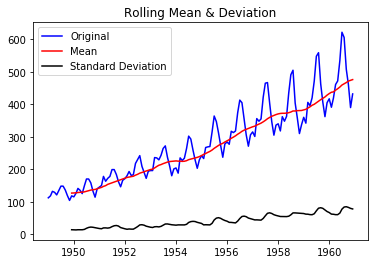

Results Of Dickey-Fuller Test
Test Statistcs            0.815369
P-value                   0.991880
#Lags used               13.000000
#Obs. used              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [6]:
test_stationary(indexedDataset)

- There are 2 major reasons behind non-stationaruty of a TS:
- - Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- - Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

## Indexed Dataset Logscale

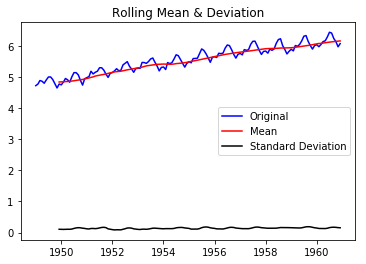

Results Of Dickey-Fuller Test
Test Statistcs           -1.717017
P-value                   0.422367
#Lags used               13.000000
#Obs. used              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [7]:
indexedDataset_logscale=np.log(indexedDataset)
test_stationary(indexedDataset_logscale)

## Dataset Log Minus Moving Average (dl_ma)

In [8]:
rolmeanlog=indexedDataset_logscale.rolling(window=12).mean()
dl_ma=indexedDataset_logscale-rolmeanlog
dl_ma.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [9]:
dl_ma.dropna(inplace=True)
dl_ma.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


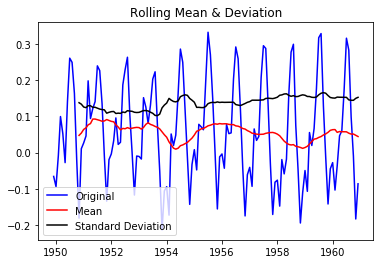

Results Of Dickey-Fuller Test
Test Statistcs           -3.162908
P-value                   0.022235
#Lags used               13.000000
#Obs. used              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [10]:
test_stationary(dl_ma)

## Exponential Decay Weighted Average (edwa)

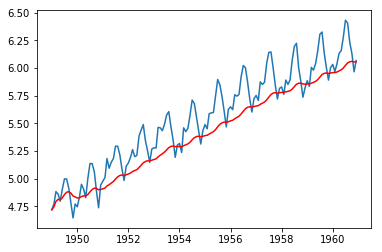

In [11]:
edwa=indexedDataset_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(edwa,color='red')

## Dataset Logscale Minus Moving Exponential Decay Average (dlmeda)

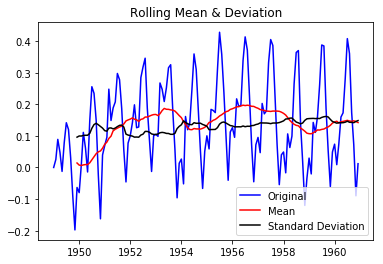

Results Of Dickey-Fuller Test
Test Statistcs           -3.601262
P-value                   0.005737
#Lags used               13.000000
#Obs. used              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [12]:
dlmeda=indexedDataset_logscale-edwa
test_stationary(dlmeda)

## Eliminating Trend and Seasonality

- Differencing – taking the differece with a particular time lag
- Decomposition – modeling both trend and seasonality and removing them from the model.

# Differencing

## Dataset Log Div Shifting (dlds)

In [13]:
#Before Shifting
indexedDataset_logscale.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [14]:
#After Shifting
indexedDataset_logscale.shift().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,4.718499
1949-03-01,4.770685
1949-04-01,4.882802
1949-05-01,4.859812


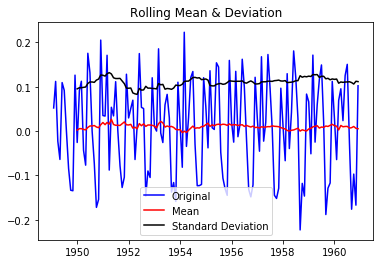

Results Of Dickey-Fuller Test
Test Statistcs           -2.717131
P-value                   0.071121
#Lags used               14.000000
#Obs. used              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [15]:
dlds=indexedDataset_logscale-indexedDataset_logscale.shift()
dlds.dropna(inplace=True)
test_stationary(dlds)

# Decomposition

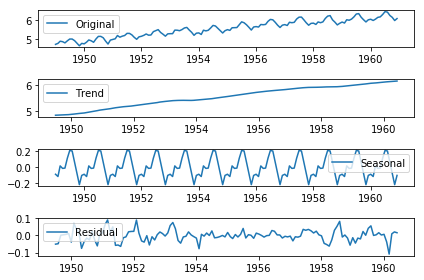

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion= seasonal_decompose(indexedDataset_logscale)

trend=decompostion.trend
seasonal=decompostion.seasonal
residual=decompostion.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout() #To Show Multiple Grpahs In One Output, Use lot.subplot(abc)

- Here trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

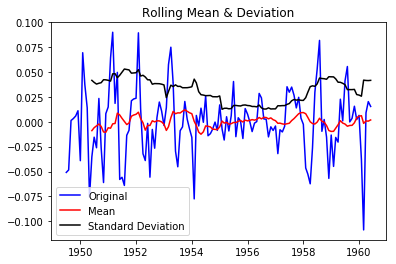

Results Of Dickey-Fuller Test
Test Statistcs         -6.332387e+00
P-value                 2.885059e-08
#Lags used              9.000000e+00
#Obs. used              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [17]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

# Forecasting a Time Series

- ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

- - Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- - Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
- - Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.


- An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers.

- - Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself-. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
- - Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

## ACF & PACF Plots

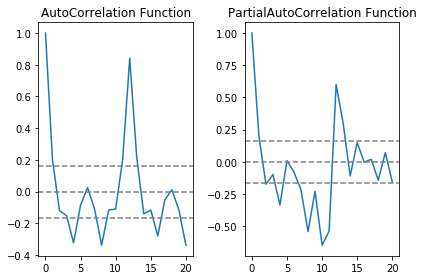

In [18]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(dlds,nlags=20)
lag_pacf=pacf(dlds,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dlds)),linestyle='--',color='gray')
plt.title('PartialAutoCorrelation Function')

plt.tight_layout()

- In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

- - p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case p=2.
- - q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If we notice closely, in this case q=2.

c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR Model


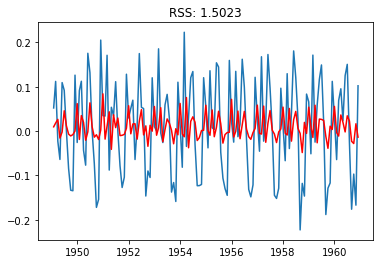

In [19]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(indexedDataset_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(dlds)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dlds['#Passengers'])**2))
print('Plotting AR Model')

c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


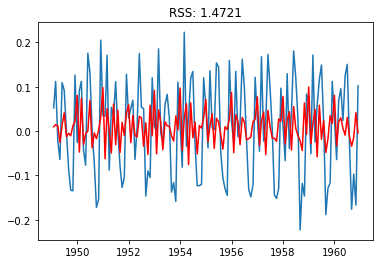

In [20]:
model = ARIMA(indexedDataset_logscale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dlds['#Passengers'])**2))
print('Plotting MA Model')

c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting Combined Model


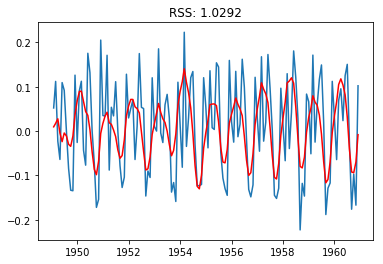

In [21]:
model = ARIMA(indexedDataset_logscale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(dlds)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dlds['#Passengers'])**2))
print('Plotting Combined Model')

# Taking it back to original scale from residual scale

In [22]:
#storing the predicted results as a separate series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64

- Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number.

In [23]:
#convert to cummuative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [24]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale['#Passengers'].ix[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

- Here the first element is base number itself and from there on the values cumulatively added.

Text(0.5, 1.0, 'RMSE: 90.1046')

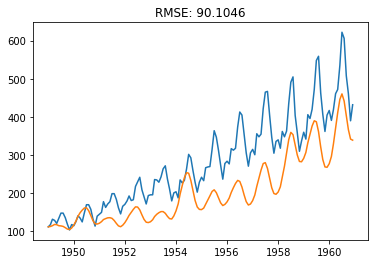

In [25]:
#Last step is to take the exponent and compare with the original series.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['#Passengers'])**2)/len(indexedDataset)))

- Finally we have a forecast at the original scale.

c:\users\romil rupen\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


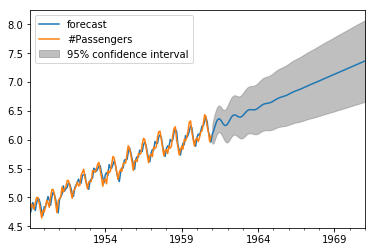

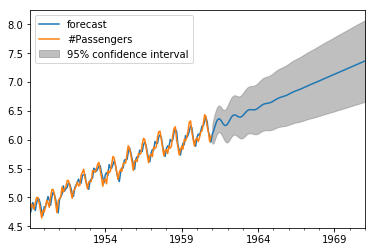

In [26]:
results_ARIMA.plot_predict(1,264)

#start = !st month
#end = 10yrs forcasting = 144+12*10 = 264th month

#Two models corresponds to AR & MA

In [27]:
x=results_ARIMA.forecast(steps=120)
print(x)
#values in residual equivalent

(array([6.09553394, 6.15281405, 6.22442967, 6.29241101, 6.34164714,
       6.36359359, 6.35784683, 6.33139303, 6.29597541, 6.26447716,
       6.24738329, 6.25025174, 6.27275837, 6.3094031 , 6.35151488,
       6.38988648, 6.41727372, 6.43011046, 6.42906682, 6.41842484,
       6.40456153, 6.39403615, 6.39183083, 6.40019502, 6.41833689,
       6.44295402, 6.46937427, 6.49293976, 6.51024108, 6.51989023,
       6.5226757 , 6.5211238 , 6.51864521, 6.51853685, 6.52311918,
       6.53322355, 6.54812863, 6.56591549, 6.58410298, 6.60036528,
       6.61313254, 6.62192769, 6.62737777, 6.63093118, 6.6343868 ,
       6.63937976, 6.64696496, 6.65739832, 6.67015314, 6.68414239,
       6.69806613, 6.71077887, 6.72157717, 6.73033969, 6.73749797,
       6.74386365, 6.7503731 , 6.7578258 , 6.7666867 , 6.7769981 ,
       6.78841305, 6.80032839, 6.81207179, 6.82308743, 6.83307119,
       6.84202476, 6.85022296, 6.85811205, 6.86617324, 6.87479135,
       6.88416287, 6.89426367, 6.90487872, 6.9156792 , 6.9263

In [28]:
for i in range(0,6):
    print(x[0][i],end='')
    print('\t',x[1][i],end='')
    print('\t',x[2][i])

6.095533935808527	 0.08384711326292077	 [5.93119661 6.25987126]
6.152814046286471	 0.10749461305088677	 [5.94212848 6.36349962]
6.224429668957615	 0.11568693743016506	 [5.99768744 6.4511719 ]
6.2924110088595215	 0.11702774115529903	 [6.06304085 6.52178117]
6.341647144482609	 0.11703495744713142	 [6.11226284 6.57103145]
6.363593588218167	 0.11744016483422148	 [6.13341509 6.59377208]


In [29]:
np.exp(results_ARIMA.forecast(steps=120)[0])

array([ 443.87098053,  470.0382368 ,  504.93498023,  540.45480084,
        567.7306761 ,  580.32807386,  577.00263292,  561.93884514,
        542.38463434,  525.56672769,  516.65910766,  518.1432481 ,
        529.93712641,  549.71672532,  573.36062512,  595.78894085,
        612.3314525 ,  620.24245355,  619.59548656,  613.03672459,
        604.59664191,  598.26640662,  596.94848834,  601.96242188,
        612.98280851,  628.25995268,  645.07995585,  660.46211089,
        671.9884015 ,  678.50390135,  680.39648555,  679.34139922,
        677.65967725,  677.58624898,  680.69829902,  687.61119251,
        697.93685071,  710.46201629,  723.50176085,  735.36375181,
        744.81252095,  751.39215027,  755.49848106,  758.18785421,
        760.81239018,  764.62059934,  770.44244972,  778.52282961,
        788.51635189,  799.62462106,  810.83625827,  821.210006  ,
        830.12573309,  837.43168749,  843.44775973,  848.83400799,
        854.37747334,  860.7686792 ,  868.42975063,  877.43081

In [30]:
aAaAAAaa

NameError: name 'aAaAAAaa' is not defined